In [2]:
#Cem Şanal
#I changed Null datas to 0.
%matplotlib inline

import scipy as sc
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt

df_arac = pd.read_csv(u'data/arac.csv',sep=';')
df_arac

,Year,All,Car,Minibus,Bus,SmallTruck,Truck,Motorcycle,SpecialVehicles,Machinery,Tractor
0,1966,231977,91469,10913,12041,31462,47931,32099,3610,2452,0
1,1967,284194,112367,16008,13332,39927,56889,39647,3641,2383,0
2,1968,318768,125375,18967,13948,43441,62616,47062,4033,3326,0
3,1969,354398,137345,20540,15529,48655,69478,52959,4568,5324,0
4,1970,369808,137771,20916,15980,52152,70730,60994,5070,6195,0
5,1971,403880,153676,22380,17140,57011,73433,68417,5349,6474,0
6,1972,460087,187272,25559,18504,62796,78920,74402,5747,6887,0
7,1973,543318,240360,30055,20011,71043,86780,80860,6420,7789,0
8,1974,647947,313160,34122,21404,81025,95309,86028,7338,9561,0
9,1975,785920,403546,40623,23763,98579,108381,91421,8450,11157,0


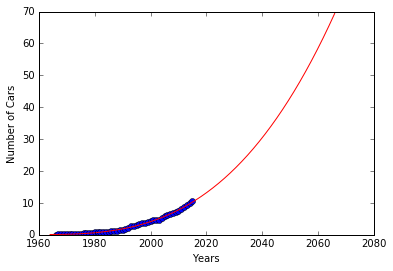

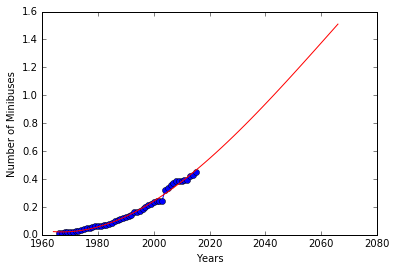

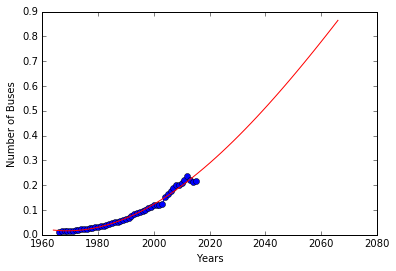

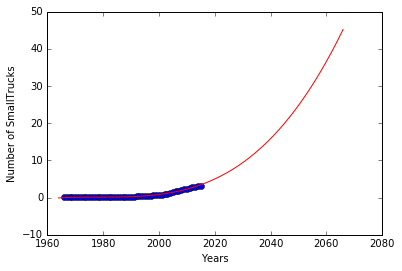

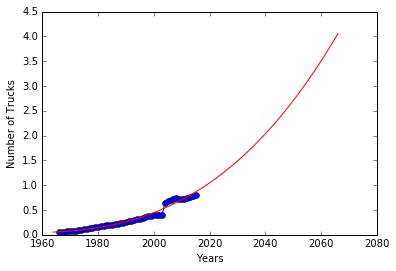

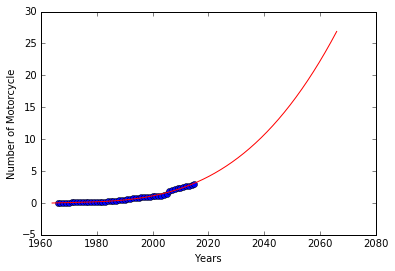

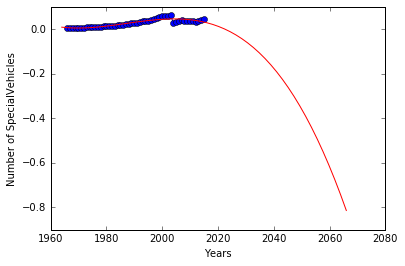

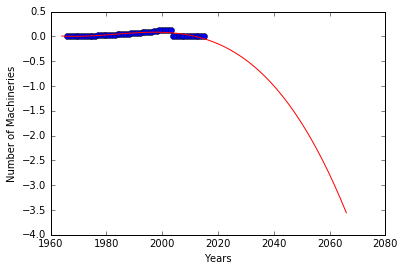

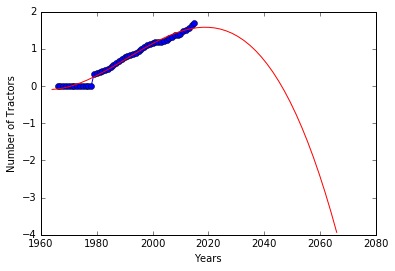

In [6]:
# More than half of the graphs are can't shown with fitting AR Model.
# We can't obtain effective results with using AR model. Therefore, I prefer Polynomial. 

BaseYear = 1966
x = np.matrix(df_arac.Year[0:]).T-BaseYear
y = np.matrix(df_arac.Car[0:]).T/1000000.0
z = np.matrix(df_arac.Minibus[0:]).T/1000000.0
t = np.matrix(df_arac.Bus[0:]).T/1000000.0
c = np.matrix(df_arac.SmallTruck[0:]).T/1000000.0
tr = np.matrix(df_arac.Truck[0:]).T/1000000.0
mot = np.matrix(df_arac.Motorcycle[0:]).T/1000000.0
sv = np.matrix(df_arac.SpecialVehicles[0:]).T/1000000.0
mac = np.matrix(df_arac.Machinery[0:]).T/1000000.0
trac = np.matrix(df_arac.Tractor[0:]).T/1000000.0

#Polynomial
# Setup the vandermonde matrix
N = len(x)
degree = 3

A = np.hstack((np.power(x,i) for i in range(degree+1)))
xx = np.matrix(np.linspace(-2, 100)).T
A2 = np.hstack((np.power(xx,i) for i in range(degree+1)))

#plt.imshow(A, interpolation='nearest')
# Solve the least squares problem
w_ls,E,rank,sigma = np.linalg.lstsq(A, y)

f = A2*w_ls
plt.plot(x+BaseYear, y, 'o-')
plt.plot(xx+BaseYear, f, 'r')


plt.xlabel('Years')
plt.ylabel('Number of Cars')

plt.show()

w_ls,E,rank,sigma = np.linalg.lstsq(A, z)

f = A2*w_ls
plt.plot(x+BaseYear, z, 'o-')
plt.plot(xx+BaseYear, f, 'r')


plt.xlabel('Years')
plt.ylabel('Number of Minibuses')

plt.show()

w_ls,E,rank,sigma = np.linalg.lstsq(A, t)

f = A2*w_ls
plt.plot(x+BaseYear, t, 'o-')
plt.plot(xx+BaseYear, f, 'r')


plt.xlabel('Years')
plt.ylabel('Number of Buses')

plt.show()

w_ls,E,rank,sigma = np.linalg.lstsq(A, c)

f = A2*w_ls
plt.plot(x+BaseYear, c, 'o-')
plt.plot(xx+BaseYear, f, 'r')


plt.xlabel('Years')
plt.ylabel('Number of SmallTrucks')

plt.show()

w_ls,E,rank,sigma = np.linalg.lstsq(A, tr)

f = A2*w_ls
plt.plot(x+BaseYear, tr, 'o-')
plt.plot(xx+BaseYear, f, 'r')


plt.xlabel('Years')
plt.ylabel('Number of Trucks')

plt.show()

w_ls,E,rank,sigma = np.linalg.lstsq(A, mot)

f = A2*w_ls
plt.plot(x+BaseYear, mot, 'o-')
plt.plot(xx+BaseYear, f, 'r')


plt.xlabel('Years')
plt.ylabel('Number of Motorcycle')

plt.show()

w_ls,E,rank,sigma = np.linalg.lstsq(A, sv)

f = A2*w_ls
plt.plot(x+BaseYear, sv, 'o-')
plt.plot(xx+BaseYear, f, 'r')


plt.xlabel('Years')
plt.ylabel('Number of SpecialVehicles')

plt.show()

w_ls,E,rank,sigma = np.linalg.lstsq(A, mac)

f = A2*w_ls
plt.plot(x+BaseYear, mac, 'o-')
plt.plot(xx+BaseYear, f, 'r')


plt.xlabel('Years')
plt.ylabel('Number of Machineries')

plt.show()

w_ls,E,rank,sigma = np.linalg.lstsq(A, trac)

f = A2*w_ls
plt.plot(x+BaseYear, trac, 'o-')
plt.plot(xx+BaseYear, f, 'r')


plt.xlabel('Years')
plt.ylabel('Number of Tractors')

plt.show()

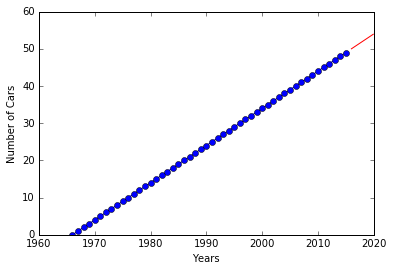

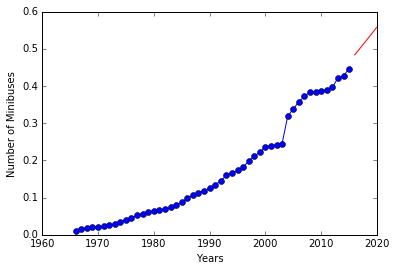

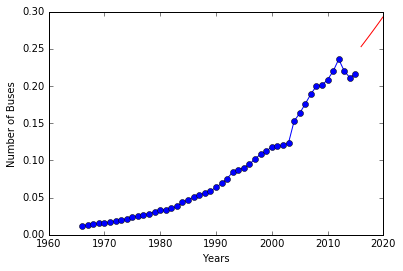

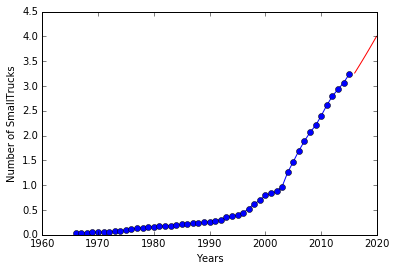

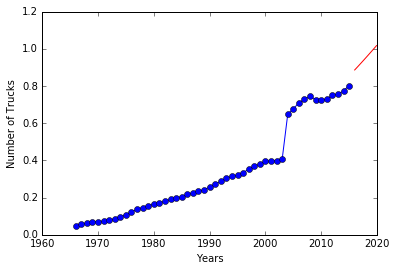

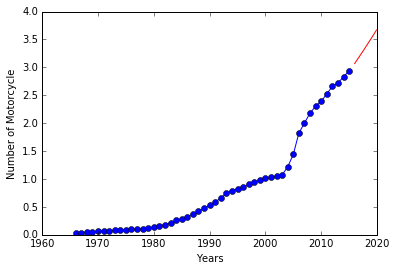

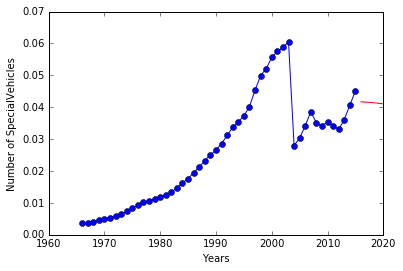

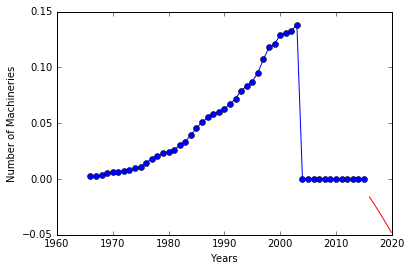

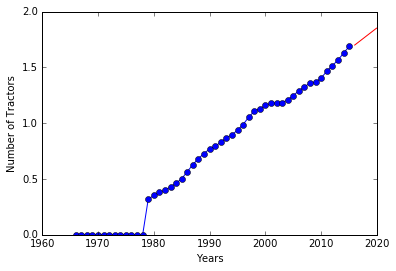

In [7]:
BaseYear = 1966

#Auto Regressive
# Prediction
N = len(x)
degree = 2

A = np.hstack((np.power(x,i) for i in range(degree+1)))
TargetYear = np.arange(2016, 2020,1/12.0)
x_test = np.matrix(TargetYear - BaseYear).T
A2 = np.hstack((np.power(x_test, i)) for i in range(degree+1))

w_ls = (A.T*A).I*A.T*x

f = A2*w_ls
plt.plot(x+BaseYear, x, 'o-')
plt.plot(x_test+BaseYear, f, 'r')

plt.xlabel('Years')
plt.ylabel('Number of Cars')

plt.show()

w_ls = (A.T*A).I*A.T*z

f = A2*w_ls
plt.plot(x+BaseYear, z, 'o-')
plt.plot(x_test+BaseYear, f, 'r')

plt.xlabel('Years')
plt.ylabel('Number of Minibuses')

plt.show()

w_ls = (A.T*A).I*A.T*t

f = A2*w_ls
plt.plot(x+BaseYear, t, 'o-')
plt.plot(x_test+BaseYear, f, 'r')


plt.xlabel('Years')
plt.ylabel('Number of Buses')

plt.show()

w_ls = (A.T*A).I*A.T*c

f = A2*w_ls
plt.plot(x+BaseYear, c, 'o-')
plt.plot(x_test+BaseYear, f, 'r')

plt.xlabel('Years')
plt.ylabel('Number of SmallTrucks')

plt.show()

w_ls = (A.T*A).I*A.T*tr

f = A2*w_ls
plt.plot(x+BaseYear, tr, 'o-')
plt.plot(x_test+BaseYear, f, 'r')

plt.xlabel('Years')
plt.ylabel('Number of Trucks')

plt.show()

w_ls = (A.T*A).I*A.T*mot

f = A2*w_ls
plt.plot(x+BaseYear, mot, 'o-')
plt.plot(x_test+BaseYear, f, 'r')

plt.xlabel('Years')
plt.ylabel('Number of Motorcycle')

plt.show()

w_ls = (A.T*A).I*A.T*sv

f = A2*w_ls
plt.plot(x+BaseYear, sv, 'o-')
plt.plot(x_test+BaseYear, f, 'r')


plt.xlabel('Years')
plt.ylabel('Number of SpecialVehicles')

plt.show()

w_ls = (A.T*A).I*A.T*mac

f = A2*w_ls
plt.plot(x+BaseYear, mac, 'o-')
plt.plot(x_test+BaseYear, f, 'r')


plt.xlabel('Years')
plt.ylabel('Number of Machineries')

plt.show()

w_ls = (A.T*A).I*A.T*trac

f = A2*w_ls
plt.plot(x+BaseYear, trac, 'o-')
plt.plot(x_test+BaseYear, f, 'r')

plt.xlabel('Years')
plt.ylabel('Number of Tractors')

plt.show()